In [7]:
from turtle import shape
from tsai.all import *
import pandas as pd
from datenverarbeitung.dataloader import dataloader

num_scenario = 1
dl = dataloader(scenario= num_scenario, path="/home/adi/cloudy_adlu/smart_hans/AP2/Daten/single_file_for_testing", nr_taps=1, move_window_by=-10, feature_list = ["nosetip_y", "pitch"])
train, test = dl.get_train_test(frac = 0.8, seed = 0)

X_train, y_train = df2xy (train, sample_col='index', feat_col='feature', target_col='target', data_cols=None)
X_test, y_test = df2xy (test, sample_col='index', feat_col='feature', target_col='target', data_cols=None)

#X, y = combine_split_data([X_train, X_test], [y_train, y_test])


X, y, _ = get_UCR_data("/home/adi/cloudy_adlu/smart_hans/AP2/Daten/single_file_for_testing/", return_split=False)
print(X.shape)
print(y.shape)
#print(splits)

# X_train, y_train = df2xy(train_df, target_col='target')
# np.shape(X)
# test_eq(X_test.shape, (60, 1, 40))
# test_eq(y_test.shape, (60, ))

tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dsets

dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)

dls.show_batch(sharey=True)

smart_hans_07252022_153833_8_281-318_08_mgy_adrian_im_hintergrund.csv


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 640 and the array at index 1 has size 160

In [24]:
scenario_name_stage0 = "scenario_{}_stage0".format(num_scenario)
model = InceptionTime(dls.vars, dls.c)
learn = ts_learner(dls, model, metrics=accuracy, train_metrics=True)
learn.save(scenario_name_stage0)

Path('models/scenario_1_stage0.pth')

SuggestedLRs(valley=0.0004786300996784121)

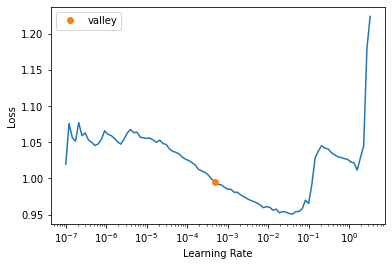

In [25]:
learn.load(scenario_name_stage0)
learn.lr_find()

In [26]:
scenario_name_stage1 = scenario_name_stage0.replace("0","1")
learn.fit_one_cycle(100, lr_max=1e-3)
learn.save(scenario_name_stage1)

epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.956364,0.527478,1.008284,0.410753,00:06
1,0.912216,0.567349,0.926027,0.505376,00:04
2,0.888314,0.571121,0.909167,0.494624,00:05
3,0.876032,0.568965,0.913233,0.498925,00:04
4,0.866126,0.555496,0.907357,0.509677,00:04
5,0.861230,0.563039,0.912286,0.505376,00:04
6,0.858188,0.566810,0.913401,0.511828,00:04
7,0.857816,0.564655,0.899772,0.494624,00:04
8,0.860045,0.534483,0.912274,0.473118,00:04
9,0.860257,0.564655,0.913537,0.520430,00:04


Path('models/scenario_1_stage1.pth')

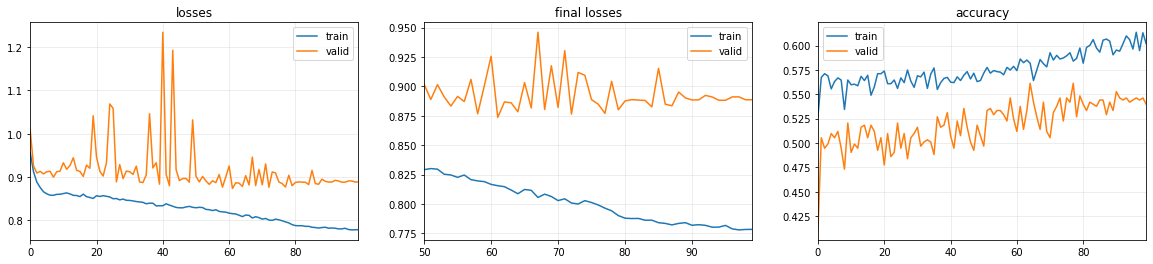

In [27]:
learn.recorder.plot_metrics()

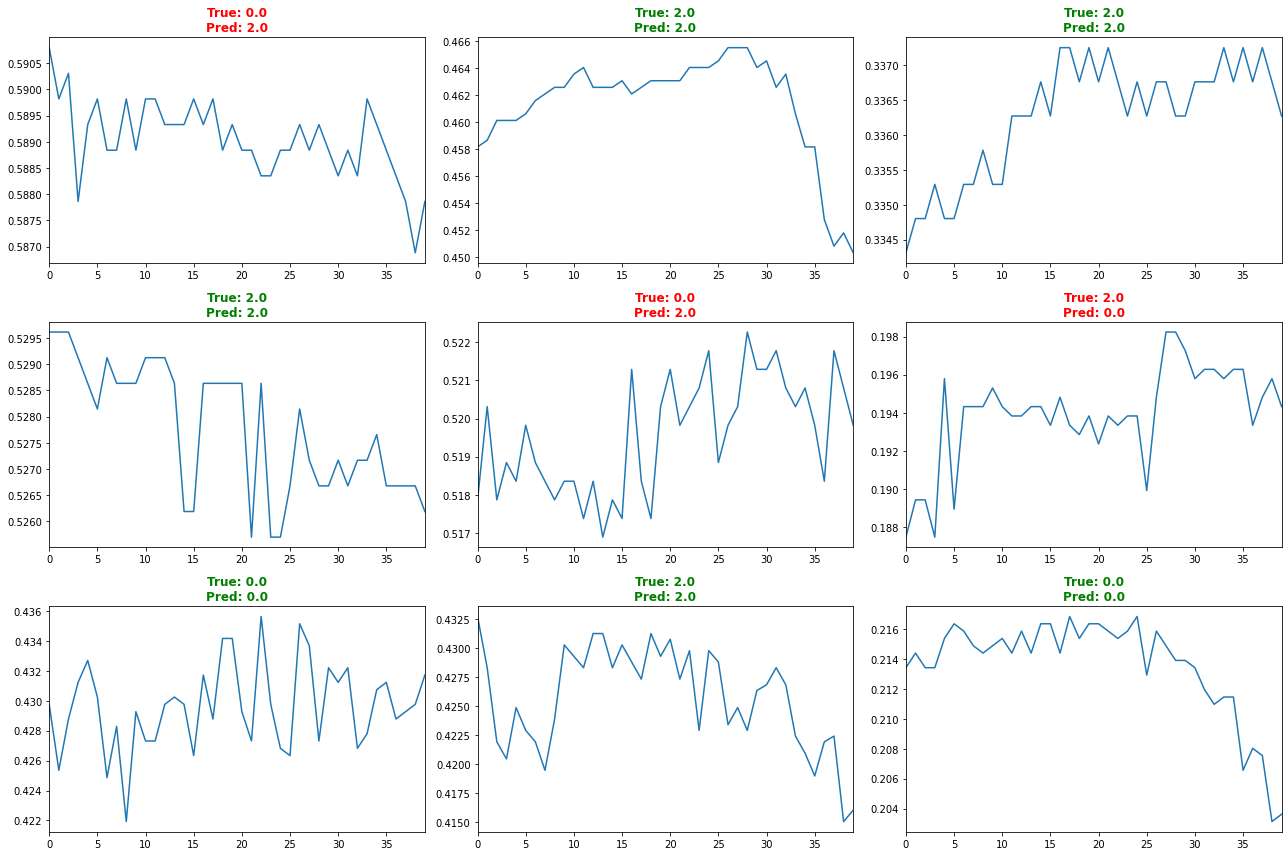

In [28]:
learn.show_results()

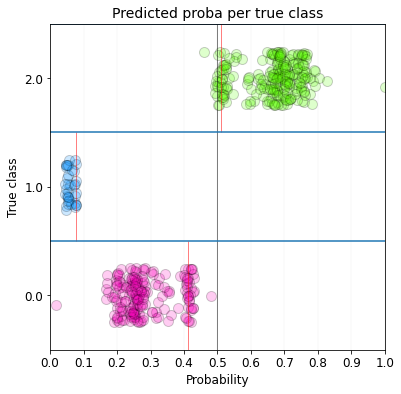

In [29]:
learn.show_probas()
#was sagt probability aus? accuracy vs probability?

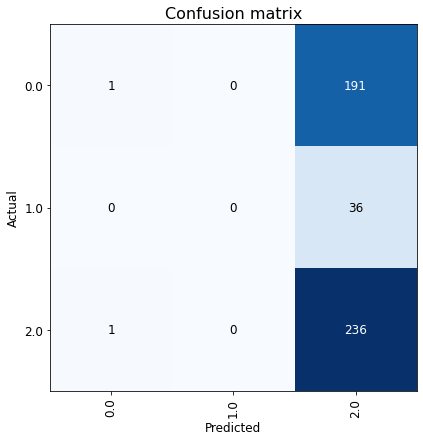

In [30]:
learn.plot_confusion_matrix()

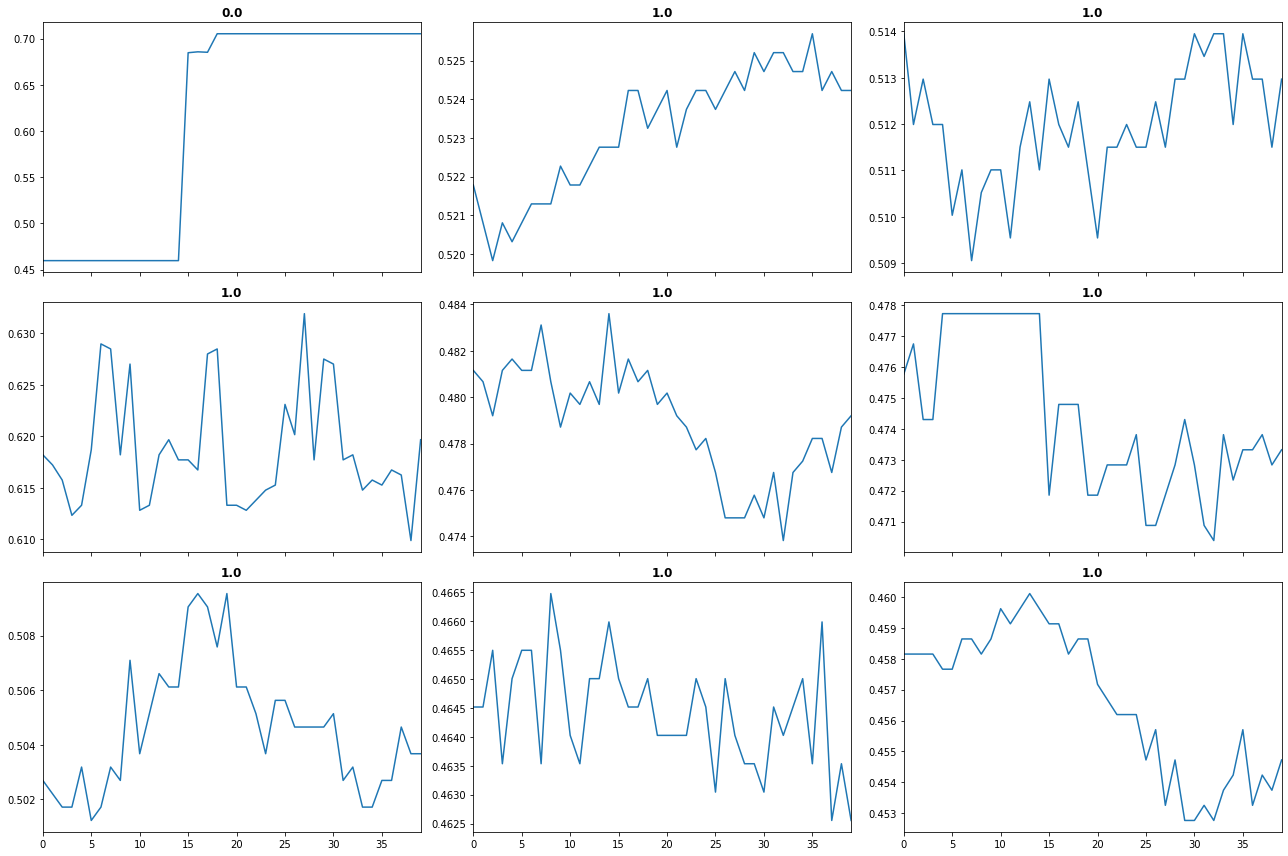

In [31]:
learn.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)